In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [3]:
df=pd.read_csv('/content/Food-Truck-LineReg.csv',names=['x_label','y_label'])
df

,x_label,y_label
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


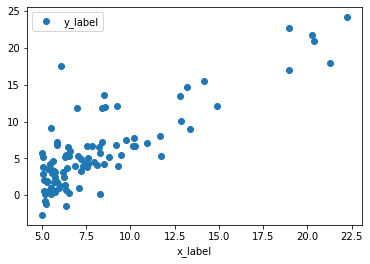

In [7]:
df.plot(x="x_label",y="y_label",style="o")

In [9]:
x_mean=df['x_label'].mean()
y_mean=df['y_label'].mean()

In [11]:
df['x']=df['x_label']-x_mean
df['y']=df['y_label']-y_mean
df['x^2']=df['x']**2
df['y^2']=df['y']**2
df['x*y']=df['x']*df['y']

In [13]:
summ_xy=df['x*y'].sum()
summ_x_sq=df['x^2'].sum()
summ_y_sq=df['y^2'].sum()
print(summ_xy,summ_x_sq,summ_y_sq)
correlation=summ_xy/(summ_x_sq*summ_y_sq)**0.2

1715.219528539 1437.69585786 2914.8470516572247


In [15]:
std_x=statistics.stdev(df["x_label"])
std_y=statistics.stdev(df['y_label'])
print(std_x,std_y)

3.8698835278823314 5.510262255231544


In [17]:
m=correlation/(std_y/std_x)
m

115.70111095094917

In [18]:
c=y_mean-m*x_mean

In [20]:
df['y_prediction']=m*df['x_label'] + c
df

,x_label,y_label,x,y,x^2,y^2,x*y,y_prediction
0,6.1101,17.59200,-2.0497,11.752865,4.201270,138.129834,-24.089847,-231.313432
1,5.5277,9.13020,-2.6321,3.291065,6.927950,10.831108,-8.662412,-298.697759
2,8.5186,13.66200,0.3588,7.822865,0.128737,61.197216,2.806844,47.352694
3,7.0032,11.85400,-1.1566,6.014865,1.337724,36.178600,-6.956793,-127.980770
4,5.8598,6.82330,-2.3000,0.984165,5.290000,0.968581,-2.263579,-260.273420
...,...,...,...,...,...,...,...,...
92,5.8707,7.20290,-2.2891,1.363765,5.239979,1.859855,-3.121794,-259.012278
93,5.3054,1.98690,-2.8544,-3.852235,8.147599,14.839715,10.995820,-324.418116
94,8.2934,0.14454,0.1336,-5.694595,0.017849,32.428413,-0.760798,21.296803
95,13.3940,9.05510,5.2342,3.215965,27.396850,10.342431,16.833004,611.441890


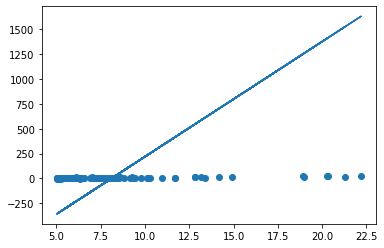

In [22]:
plot1=plt.scatter(df['x_label'],df['y_label'])
plot2=plt.plot(df['x_label'],df['y_prediction'])
plt.show()

In [24]:
ssr=sum((df['y_prediction']-y_mean)**2)
ssr

19246070.82035507

In [26]:
sse=sum((df['y_label']-df['y_prediction'])**2)
sse

18852080.057453267

In [28]:
tss=sse+ssr
tss

38098150.87780833

In [30]:
cost=sse/96
cost

196375.83393180487

In [31]:
r_sq=correlation**2
r_sq

6602.77211094585